# Data Upload and info

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from google.colab import files

In [ ]:
data = pd.read_csv('/content/spotify_dataset/dataset-of-00s.csv')
#removing 3 first columns that don't have feature values
data = data.iloc[: , 3:]
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# Feature Selection

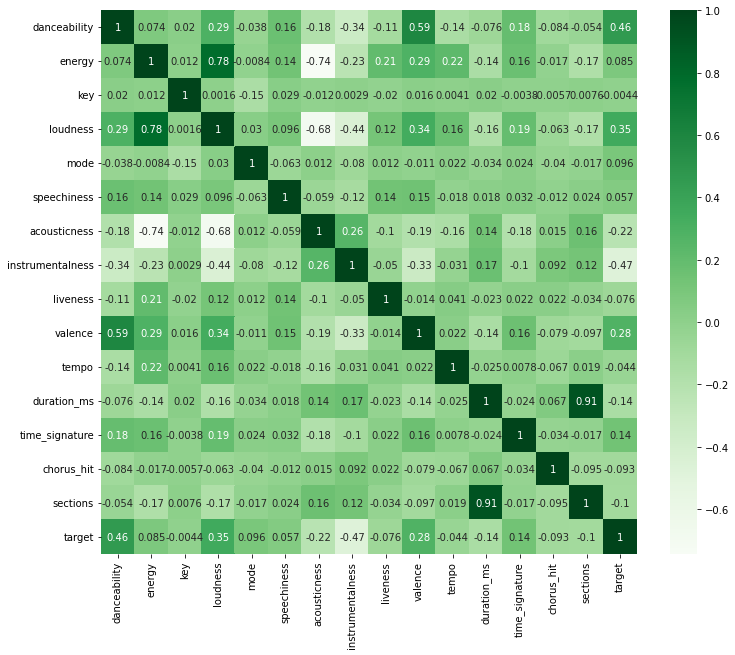

In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

In [ ]:
corr_pairs = cor.unstack()
strong_pairs = corr_pairs[abs(corr_pairs) > 0.9]
strong_pairs = strong_pairs[strong_pairs != 1]
# features with strongest correlation
remove_features=[]
for i in strong_pairs.index:
  remove_features.append(i[0])
remove_features = list(set(remove_features))
remove_features

['duration_ms', 'sections']

In [ ]:
#remove highly correlated features
data = data.drop(columns=remove_features)

#splitting data into features and targets
array = data.values
index = data.shape[1]-1

X = array[:,0:index]
y = array[:,index]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
print(X.shape)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)               

(5872, 13)
(5872, 5)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # 70% training and 30% test

model = RidgeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

(metrics.accuracy_score(y_test, y_pred))

0.8144154370034052

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=100) # 70% training and 30% test

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

(metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# create dataset
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # 70% training and 30% test


def kfold_pair(model, xFeat, y, k):
    """
    Split xFeat into k different groups, and then use each of the
    k-folds as a validation set, with the model fitting on the remaining
    k-1 folds. Return the model performance on the training and
    validation (test) set. 


    Parameters
    ----------
    model : sktree.DecisionTreeClassifier
        Decision tree model
    xFeat : nd-array with shape n x d
        Features of the dataset 
    y : 1-array with shape n x 1
        Labels of the dataset
    k : int
        Number of folds or groups (approximately equal size)

    Returns
    -------
    trainAuc : float
        Average AUC of the model on the training dataset
    testAuc : float
        Average AUC of the model on the validation dataset
    timeElapsed: float
        Time it took to run this function
    """
    #xFeat = xFeat.to_numpy()
    #y = y.to_numpy()
    folder = KFold(n_splits=k)
    predictionsTotalTrain = 0.0
    predictionsTotalTest = 0.0
    kfoldIter = folder.split(xFeat)#returns the pairs
    return kfoldIter


model = RidgeClassifier()
ridgeOptimized = GridSearchCV(model,[{'alpha': range(1,10), 'fit_intercept': ['True','False']}], cv=kfold_pair(model,X_train,y_train,5))
ridgeOptimized.fit(X_train,y_train)
#model.fit(X_train, y_train)
print(ridgeOptimized.best_params_)
#y_pred = model.predict(X_test)

#(metrics.accuracy_score(y_test, y_pred))

{'alpha': 5, 'fit_intercept': 'True'}


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
logOptimized = GridSearchCV(model,[{'penalty':[ "l2", "elasticnet", "none"],'C': range(1,20)}], cv=kfold_pair(model,X_train,y_train,5))
logOptimized.fit(X_train,y_train)
print(logOptimized.best_params_)
#logisticRegr.fit(X_train, y_train)
predictions = logOptimized.predict(X_test)
score = logOptimized.score(X_test, y_test)
print(score)

{'C': 3, 'penalty': 'l2'}
0.7949591280653951
